# import the libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Accessing the Data about orthopedic

In [52]:
dataset=pd.read_csv('C:\\Users\\dell\\Documents\\GitHub\\Machine-learning-project\\Dataset\\orthopedic dataset.csv')

In [53]:
print("column Names:",dataset.columns.values)

column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [54]:
print(dataset.head(10))

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   
5         40.250200            13.921907              25.124950     26.328293   
6         53.432928            15.864336              37.165934     37.568592   
7         45.366754            10.755611              29.038349     34.611142   
8         43.790190            13.533753              42.690814     30.256437   
9         36.686353             5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal 

In [55]:
dataset.info

<bound method DataFrame.info of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal

In [56]:
dataset.describe

<bound method NDFrame.describe of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnorm

In [57]:
miss_val = dataset.isna().sum()
miss_val

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [58]:
dataset.shape

(310, 7)

# Data Analysis

In [59]:
dataset_num=dataset.select_dtypes(include=['float64','int64'])
print(dataset_num.head())

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  


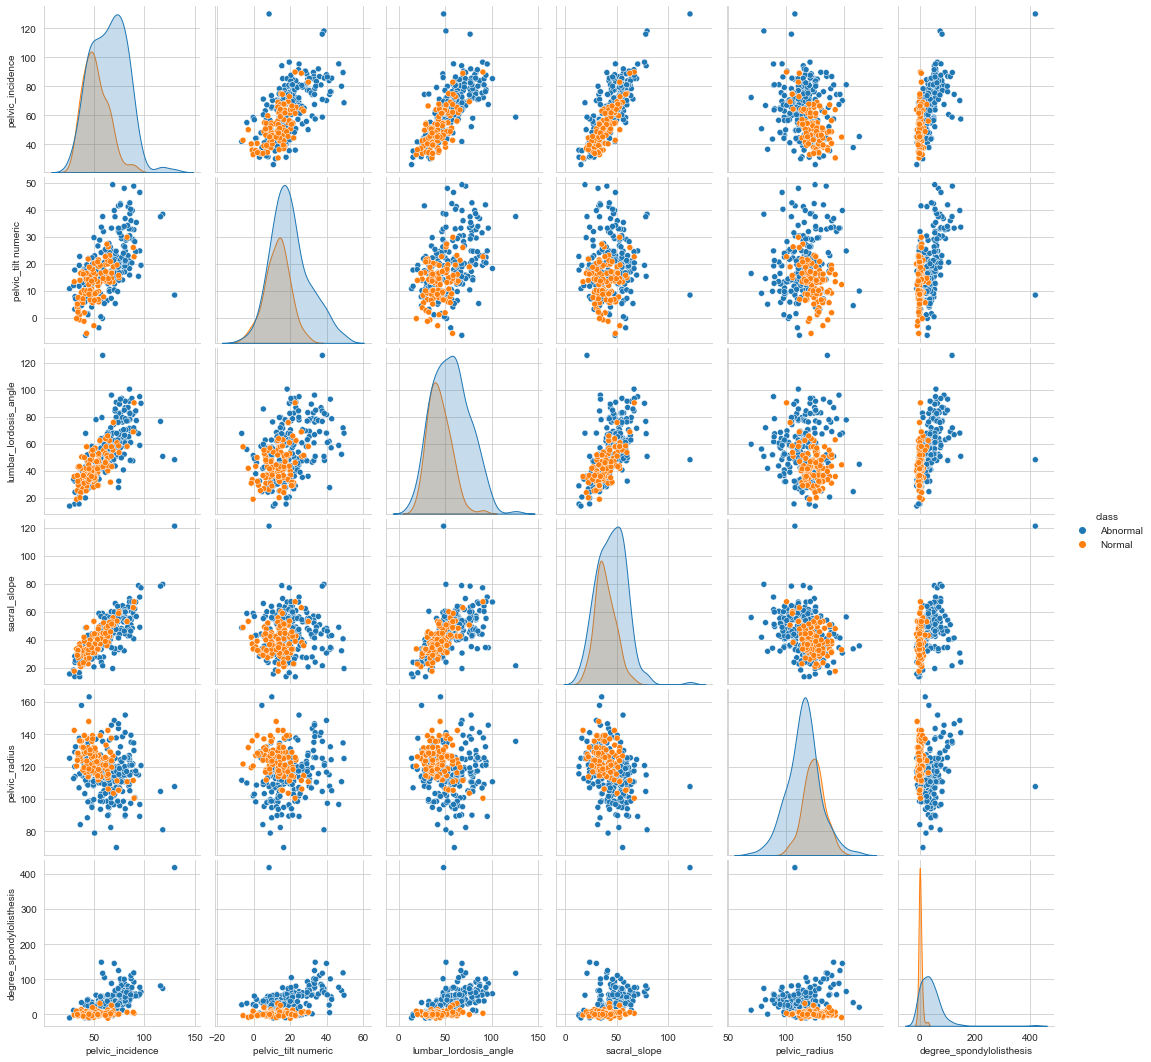

In [32]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="class")
plt.show()

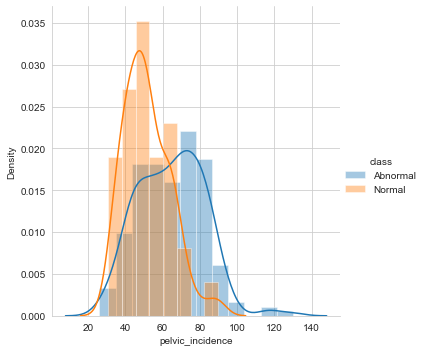

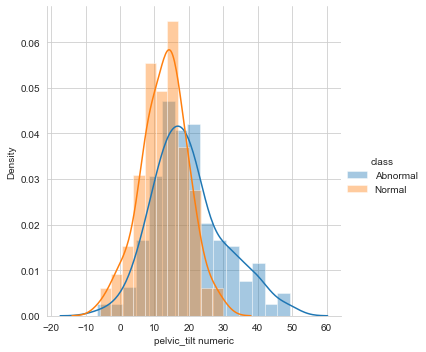

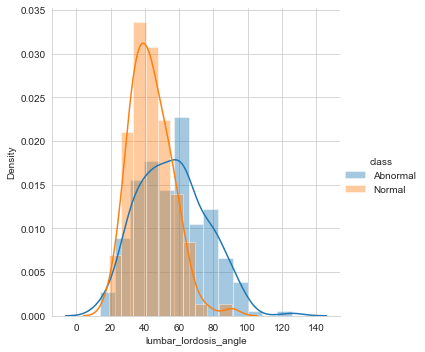

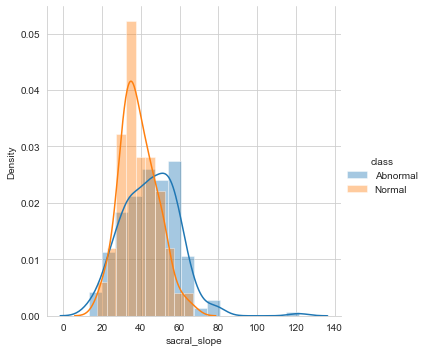

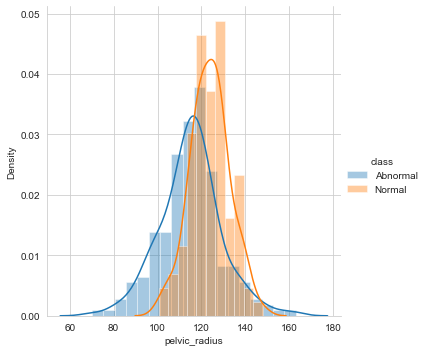

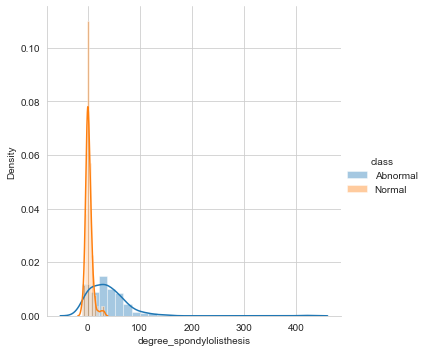

In [62]:
for name in dataset.columns.values[:-1]:
    sns.FacetGrid(dataset,hue="class").map(sns.distplot,name).add_legend()
plt.show()

<AxesSubplot:>

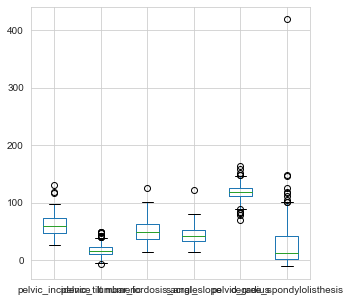

In [35]:
dataset.boxplot(column=['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
 'sacral_slope' ,'pelvic_radius', 'degree_spondylolisthesis' ],figsize=(5,5))


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['class1']=le.fit_transform(dataset['class'])

In [66]:
data_ct=dataset.select_dtypes(include='object')
data_ct.head()

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [67]:
dataset['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

Text(0.5, 1.0, 'class distribution')

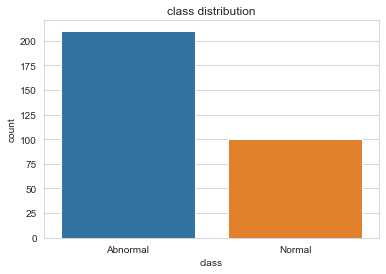

In [68]:
sns.countplot('class',data=dataset)
plt.title("class distribution")

In [70]:
corr=dataset.corr()
corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.443687
class1,-0.353336,-0.326063,-0.312484,-0.210602,0.309857,-0.443687,1.000000


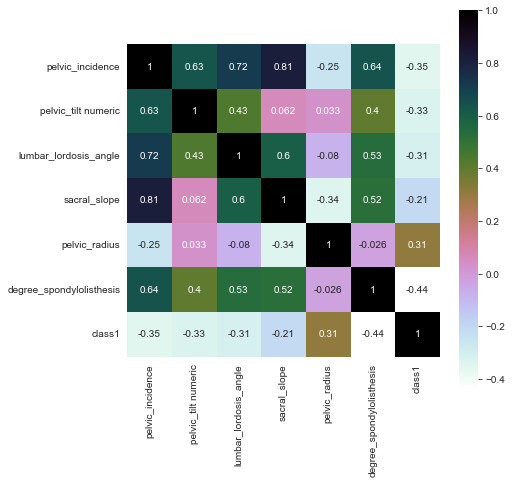

In [71]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

# Applying naive bayes

In [2]:
import pandas as pd
import numpy as np
# Importing the dataset
dataset=pd.read_csv('C:\\Users\\dell\\Documents\\GitHub\\Machine-learning-project\\Dataset\\orthopedic dataset.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=295,shuffle=True)
print('X train shape =',X_train.shape)
print('X test shape =',X_test.shape)
print('y train shape =',y_train.shape)
print('y test shape =',y_test.shape)

X train shape = (248, 6)
X test shape = (62, 6)
y train shape = (248,)
y test shape = (62,)


In [11]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('the actual y test\n',y_test[:15])
print('the predicted y test\n',y_pred[:15])

the actual y test
 [0 0 1 0 0 0 1 1 0 0 0 0 1 1 0]
the predicted y test
 [0 1 1 0 1 0 1 1 0 0 0 0 1 1 0]


confusion matrix is  [[37  3]
 [ 0 22]]


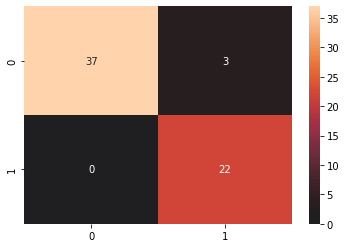

In [17]:
# define the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix is ',cm)
sns.heatmap(cm,annot=True,center=True)
plt.show()

In [21]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(round(accuracy,2)*100,'%')

95.0 %


In [29]:
#predicted_probabilities
print(classifier.predict_proba(X_test)[:2])
y_test[:2]
print('the actual y test\n',y_test[:2])
print('the predicted y test\n',y_pred[:2])

[[1.00000000e+00 5.56434379e-14]
 [1.54703065e-02 9.84529694e-01]]
the actual y test
 [0 0]
the predicted y test
 [0 1]
